# Lrp loss

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from python.model_keras import initialize_brats_model
from python.train.train_lrp_loss import train, get_lrp_loss
from python.mask_utils import mask_value, get_mask_of_brain_rgb, get_mask_of_brain, get_mask_of_seg_rgb, get_mask_of_seg, mask_loss_val
from python.data_utils import LggHggGenerator
from python.visualization import plot_rgb, plot_gray, plot_lrp
from python import plots

In [11]:
from tensorflow import keras
import innvestigate
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Data loading

In [4]:
batch_size = 32
epochs = 6
IMG_HEIGHT = 240
IMG_WIDTH = 240

In [5]:
train_dir = '../data/train/confidence_19/'
seg_train_dir = '../data/train/seg_confidence_19/'
val_dir = '../data/valid/confidence_19/'
seg_val_dir = '../data/valid/seg_confidence_19/'

train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           vertical_flip=True)
train_seg_generator = ImageDataGenerator(rotation_range=45,
                                           horizontal_flip=True,
                                           vertical_flip=True)
val_image_generator = ImageDataGenerator(rescale=1./255)
val_seg_generator = ImageDataGenerator()

lgg_hgg_generator = LggHggGenerator(train_image_generator, train_seg_generator, train_dir, seg_train_dir)
val_lgg_hgg_generator = LggHggGenerator(val_image_generator, val_seg_generator, val_dir, seg_val_dir)

In [6]:
train_image_gen = lgg_hgg_generator.get_image_generator(batch_size)
train_seg_gen = lgg_hgg_generator.get_seg_generator(batch_size)
val_image_gen = val_lgg_hgg_generator.get_image_generator(batch_size)
val_seg_gen = val_lgg_hgg_generator.get_seg_generator(batch_size)

Found 1645 images belonging to 2 classes.
Found 1645 images belonging to 2 classes.
Found 446 images belonging to 2 classes.
Found 446 images belonging to 2 classes.


### Visualization

In [7]:
x, y = next(train_image_gen)
x_seg, y_seg = next(train_seg_gen)

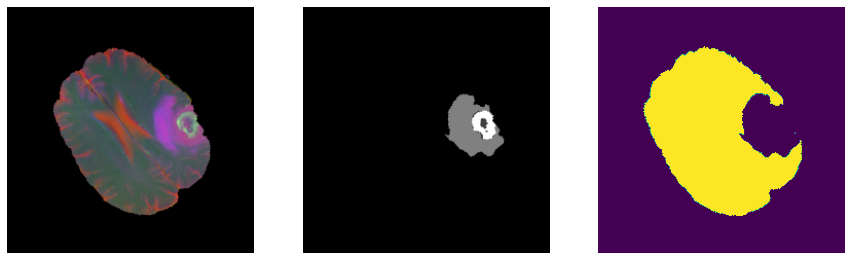

In [8]:
i = 11
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
plot_rgb(x[i], ax= axes[0])
plot_gray(x_seg[i], ax= axes[1])
plot_rgb(get_mask_of_brain(x[i], get_mask_of_seg(x_seg[i]).squeeze()), ax= axes[2])

## Model definition

In [7]:
model = initialize_brats_model(IMG_HEIGHT, IMG_WIDTH)
optimizer = keras.optimizers.Adam()
loss_function = get_lrp_loss(innvestigate.create_analyzer("lrp.epsilon", model, epsilon=1))

## Model training

In [8]:
train(model, 
      train_image_gen, 
      train_seg_gen, 
      val_image_gen, 
      val_seg_gen,
      loss_function,
      optimizer,
      epochs, 
      batch_size)

mask: 0.34890938 loss: tf.Tensor(5.7077074, shape=(), dtype=float32)
mask: 0.3354488 loss: tf.Tensor(5.931214, shape=(), dtype=float32)
mask: 0.3326808 loss: tf.Tensor(6.300448, shape=(), dtype=float32)
mask: 0.23645242 loss: tf.Tensor(12.464024, shape=(), dtype=float32)
mask: 0.3228325 loss: tf.Tensor(6.649741, shape=(), dtype=float32)
mask: 0.27652878 loss: tf.Tensor(8.922584, shape=(), dtype=float32)
mask: 0.2506807 loss: tf.Tensor(10.658807, shape=(), dtype=float32)
mask: 0.24731302 loss: tf.Tensor(11.013394, shape=(), dtype=float32)
mask: 0.22549593 loss: tf.Tensor(13.094181, shape=(), dtype=float32)
mask: 0.2800765 loss: tf.Tensor(8.728874, shape=(), dtype=float32)
mask: 0.30567628 loss: tf.Tensor(7.2614694, shape=(), dtype=float32)
mask: 0.22186373 loss: tf.Tensor(14.15006, shape=(), dtype=float32)
mask: 0.20921774 loss: tf.Tensor(13.822501, shape=(), dtype=float32)
mask: 0.17564583 loss: tf.Tensor(17.177488, shape=(), dtype=float32)
mask: 0.1879938 loss: tf.Tensor(32.323025, sh

mask: 0.3114599 loss: tf.Tensor(5.5589986, shape=(), dtype=float32)
mask: 0.2508893 loss: tf.Tensor(9.020235, shape=(), dtype=float32)
mask: 0.30556166 loss: tf.Tensor(8.684433, shape=(), dtype=float32)
mask: 0.33497924 loss: tf.Tensor(5.9348664, shape=(), dtype=float32)
mask: 0.34577125 loss: tf.Tensor(3.6593523, shape=(), dtype=float32)
mask: 0.38846254 loss: tf.Tensor(4.3322005, shape=(), dtype=float32)
mask: 0.36603385 loss: tf.Tensor(4.083721, shape=(), dtype=float32)
mask: 0.4381016 loss: tf.Tensor(3.3698323, shape=(), dtype=float32)
mask: 0.44708467 loss: tf.Tensor(2.6624386, shape=(), dtype=float32)
mask: 0.4794719 loss: tf.Tensor(4.200818, shape=(), dtype=float32)
mask: 0.4654538 loss: tf.Tensor(3.7236593, shape=(), dtype=float32)
mask: 0.5195867 loss: tf.Tensor(2.1889417, shape=(), dtype=float32)
mask: 0.5140681 loss: tf.Tensor(2.3251817, shape=(), dtype=float32)
mask: 0.517877 loss: tf.Tensor(2.3093543, shape=(), dtype=float32)
mask: 0.5663985 loss: tf.Tensor(1.5440557, shap

mask: 0.24754302 loss: tf.Tensor(4.975828, shape=(), dtype=float32)
mask: 0.24596147 loss: tf.Tensor(7.798069, shape=(), dtype=float32)
mask: 0.32141572 loss: tf.Tensor(6.104472, shape=(), dtype=float32)
mask: 0.31389067 loss: tf.Tensor(5.0625973, shape=(), dtype=float32)
mask: 0.26875657 loss: tf.Tensor(7.2269278, shape=(), dtype=float32)
mask: 0.25277817 loss: tf.Tensor(8.4145975, shape=(), dtype=float32)
mask: 0.2812949 loss: tf.Tensor(5.853005, shape=(), dtype=float32)
mask: 0.33404902 loss: tf.Tensor(3.660789, shape=(), dtype=float32)
mask: 0.26458842 loss: tf.Tensor(5.432122, shape=(), dtype=float32)
mask: 0.29105192 loss: tf.Tensor(5.700628, shape=(), dtype=float32)
mask: 0.28543842 loss: tf.Tensor(6.9114017, shape=(), dtype=float32)
mask: 0.29732728 loss: tf.Tensor(6.036339, shape=(), dtype=float32)
mask: 0.24342747 loss: tf.Tensor(6.181356, shape=(), dtype=float32)
mask: 0.23779696 loss: tf.Tensor(9.252046, shape=(), dtype=float32)
mask: 0.24707271 loss: tf.Tensor(8.1358795, s

## Evaluation

In [9]:
images, y = next(val_image_gen)
images_seg, y_seg = next(val_seg_gen)

In [10]:
# model = load_model('../models/brats19_4.h5')

In [11]:
analyzer = innvestigate.create_analyzer("lrp.epsilon", model, epsilon=1)

In [12]:
analysis = analyzer.analyze(images)['input_layer']

Mask Value:  0.91184855
Label:  0.0


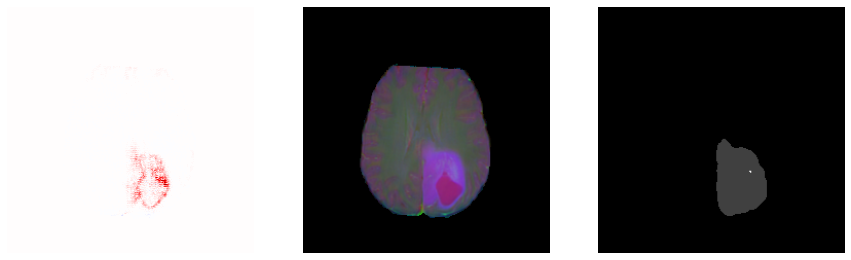

In [16]:
def postprocess_lrp(analyzed_image):
    analyzed_image = analyzed_image.sum(axis=np.argmax(np.asarray(analyzed_image.shape) == 3))
    analyzed_image /= np.max(np.abs(analyzed_image))
    return analyzed_image

label = 21
print("Mask Value: ", mask_value(analysis[label], images[label], get_mask_of_seg_rgb(images_seg[label])))
print("Label: ", y[label])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
plot_lrp(postprocess_lrp(analysis[label]), ax=axes[0])
plot_rgb(images[label], ax=axes[1])
plot_gray(images_seg[label], ax=axes[2])

In [12]:
def get_mask_stat(gen, gen_seg, model):
    analyzer = innvestigate.create_analyzer("lrp.epsilon", model, epsilon=1)
    num_batches = math.ceil(gen.samples / batch_size)
    labels = []
    pred = []
    mask_values = []
    for i, ((images, y), (images_seg, _)) in enumerate(zip(gen, gen_seg)):
        if i >= num_batches:
            break
        prob = model.predict(images)
        analysis = analyzer.analyze(images)["input_layer"]
        mask = [
            mask_value(i_a, i, get_mask_of_seg_rgb(i_s))
            for i, i_a, i_s in zip(images, analysis, images_seg)
        ]
        p = prob.argmax(axis=1)
        pred.extend(p)
        labels.extend(y)
        mask_values.extend(mask)
    return np.array(mask_values), np.array(pred), np.array(labels)

In [13]:
m, p, y = get_mask_stat(val_image_gen, val_seg_gen, model)

In [14]:
np.mean(m[y==0])

0.325475

In [15]:
np.mean(m[y==1])

0.32609656

Model performance:
              precision    recall  f1-score   support

         0.0       0.56      0.72      0.63       201
         1.0       0.70      0.53      0.61       245

    accuracy                           0.62       446
   macro avg       0.63      0.63      0.62       446
weighted avg       0.64      0.62      0.62       446



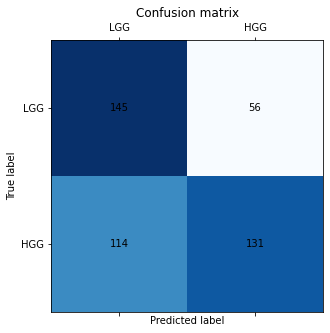

In [17]:
y_true_v = []
pred_v = []
iterations = 428 / batch_size
for i, (images, labels) in enumerate(val_image_gen):
    if i > iterations:
        break
    prob = model.predict(images)
    p = prob.argmax(axis=1)
    pred_v.extend(p)
    y_true_v.extend(labels)
plots.plot_model_performance(y_true_v, pred_v)

In [17]:
y_true_t = []
pred_t = []
iterations = 428 / batch_size
for i, (images, labels) in enumerate(test_data_gen):
    if i > iterations:
        break
    prob = model.predict(images)
    p = prob.argmax(axis=1)
    pred_t.extend(p)
    y_true_t.extend(labels)
plots.plot_model_performance(y_true_t, pred_t)

NameError: name 'test_data_gen' is not defined

In [1]:
!pip install --use-feature=2020-resolver "git+https://github.com/albermax/innvestigate.git@updates_towards_tf2.0"

  Cloning https://github.com/albermax/innvestigate.git (to revision updates_towards_tf2.0) to /tmp/pip-req-build-suzzirsa
     |████████████████████████████████| 829 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 421.8 MB 77 kB/s s eta 0:00:01     |█████████████████████████████▉  | 393.7 MB 12.1 MB/s eta 0:00:03
     |████████████████████████████████| 50 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 9.6 MB/s eta 0:00:01


     |████████████████████████████████| 448 kB 13.5 MB/s eta 0:00:01
  Created wheel for innvestigate: filename=innvestigate-2.0.0-py3-none-any.whl size=107093 sha256=41687b31734fd40904e5944c02cdd2dab05978cd7bff76dcdb37275349edbe8d
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhk47u5o/wheels/5c/25/10/76772cf76d6eb4346d31e1f6e32bce55ee94d9e7c6c98d1a3f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=493275 sha256=e5e2acd3a1c53d3c8f8917819058c97d57ee85f4952c2d7383ca2a7316aceff6
  Stored in directory: /root/.cache/pip/wheels/6e/9c/ed/4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7635 sha256=3ef675e9b171b22f5f4c4fda5b7ce90f354e0b540166c2368067352157b7dcbc
  Stored in directory: /root/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe
Successfully built innvestigate future gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflo